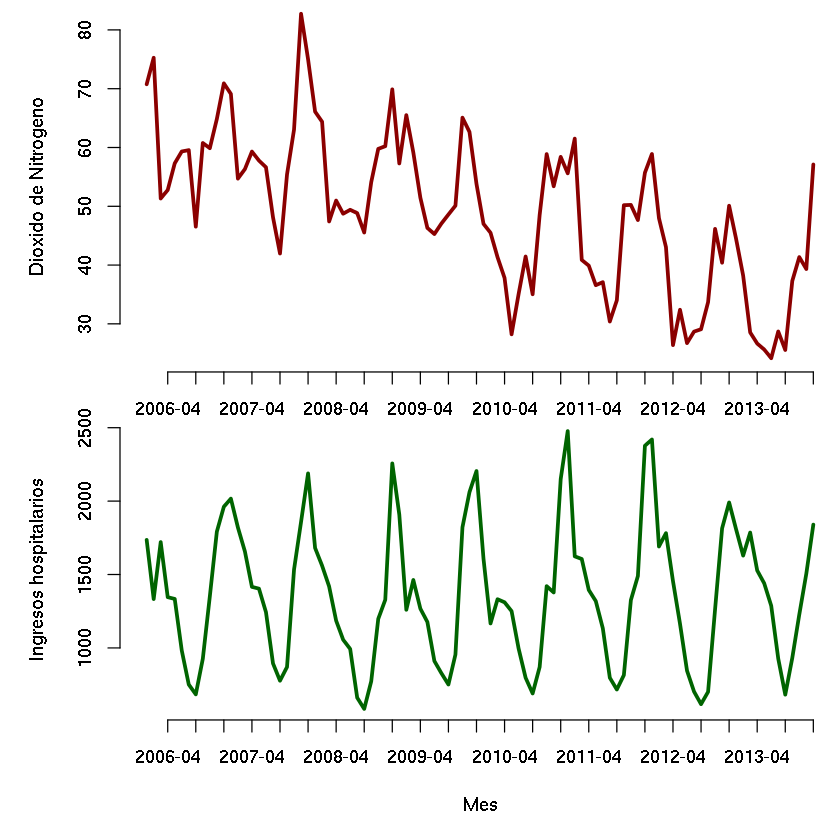

In [22]:
data <- read.table("ElDiario-contaminacion-madrid.dat", header=F)
s <- seq(1, length(data$V1))
dates <- data$V1
enf <- data$V2
NO <- data$V3

par(mfrow=c(2,1))
par(mar=c(2,5,0,0))
plot(s, NO, type="l", ylab="Dioxido de Nitrogeno", xlab="Mes", axes=F, col="darkred", lwd=3)
axis(2)
axis(1, at=s[s%%4==0], labels=dates[s%%4==0])
par(mar=c(5,5,0,0))
plot(s, enf, type="l", ylab="Ingresos hospitalarios", xlab="Mes", axes=F, col="darkgreen", lwd=3)
axis(2)
axis(1, at=s[s%%4==0], labels=dates[s%%4==0])

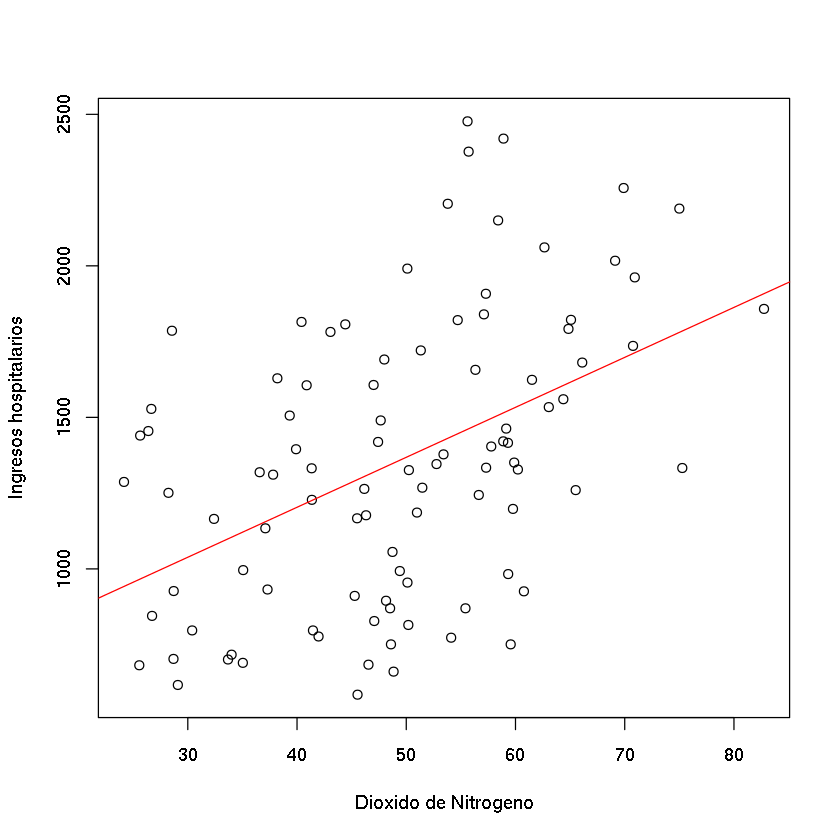

In [20]:
plot(NO, enf, xlab="Dioxido de Nitrogeno", ylab="Ingresos hospitalarios")
lin <- lm(enf~NO)
abline(lin$coefficients[1], lin$coefficients[2], col="red")

In [21]:
cor.test(NO, enf)


	Pearson's product-moment correlation

data:  NO and enf
t = 5.0259, df = 94, p-value = 2.385e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2861411 0.6048980
sample estimates:
      cor 
0.4602252 


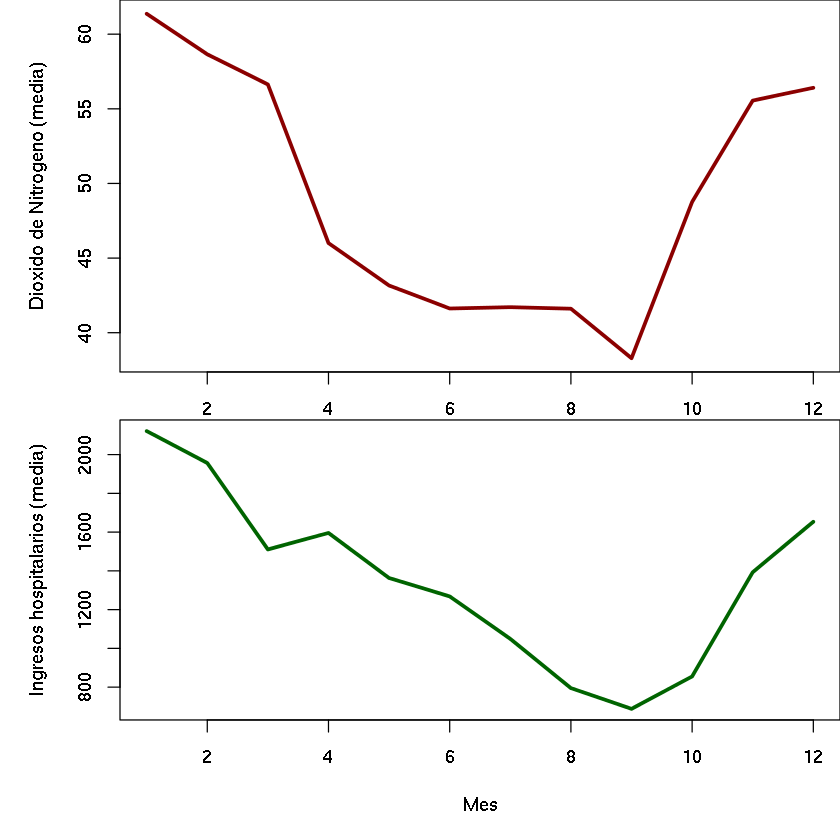

In [50]:
msumsEnf <- rep(0,12)
msumsNO <- rep(0,12)
mcounts <- rep(0,12)
for (i in s)
    {
        msumsEnf[i%%12 +1] <- msumsEnf[i%%12 +1] + enf[i]
        msumsNO[i%%12 +1] <- msumsNO[i%%12 +1] + NO[i]
        mcounts[i%%12 +1] <- mcounts[i%%12 +1] +1
    }

par(mfrow=c(2,1))
par(mar=c(2,5,0,0))
plot(seq(1,12), msumsNO/mcounts, type="l", ylab="Dioxido de Nitrogeno (media)", xlab="Mes", col="darkred", lwd=3)
par(mar=c(5,5,0,0))
plot(seq(1,12), msumsEnf/mcounts, type="l", ylab="Ingresos hospitalarios (media)", xlab="Mes", col="darkgreen", lwd=3)


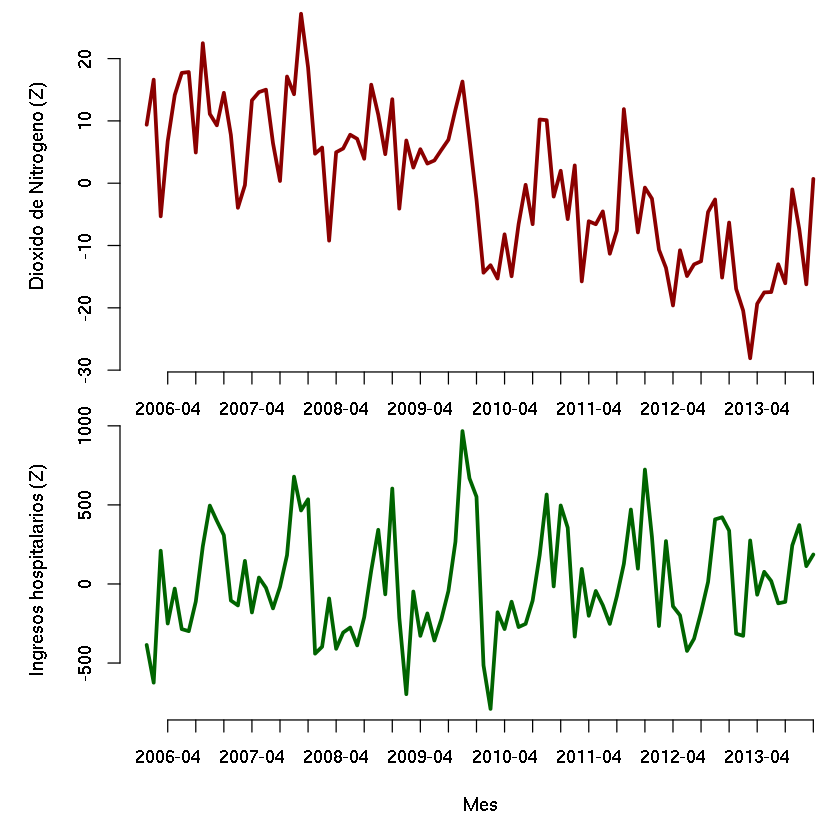

In [32]:

enfM <- enf - rep(msumsEnf/mcounts, mcounts[1])
NOM <- NO - rep(msumsNO/mcounts, mcounts[1])

par(mfrow=c(2,1))
par(mar=c(2,5,0,0))
plot(s, NOM, type="l", ylab="Dioxido de Nitrogeno (Z)", xlab="Mes", axes=F, col="darkred", lwd=3)
axis(2)
axis(1, at=s[s%%4==0], labels=dates[s%%4==0])
par(mar=c(5,5,0,0))
plot(s, enfM, type="l", ylab="Ingresos hospitalarios (Z)", xlab="Mes", axes=F, col="darkgreen", lwd=3)
axis(2)
axis(1, at=s[s%%4==0], labels=dates[s%%4==0])

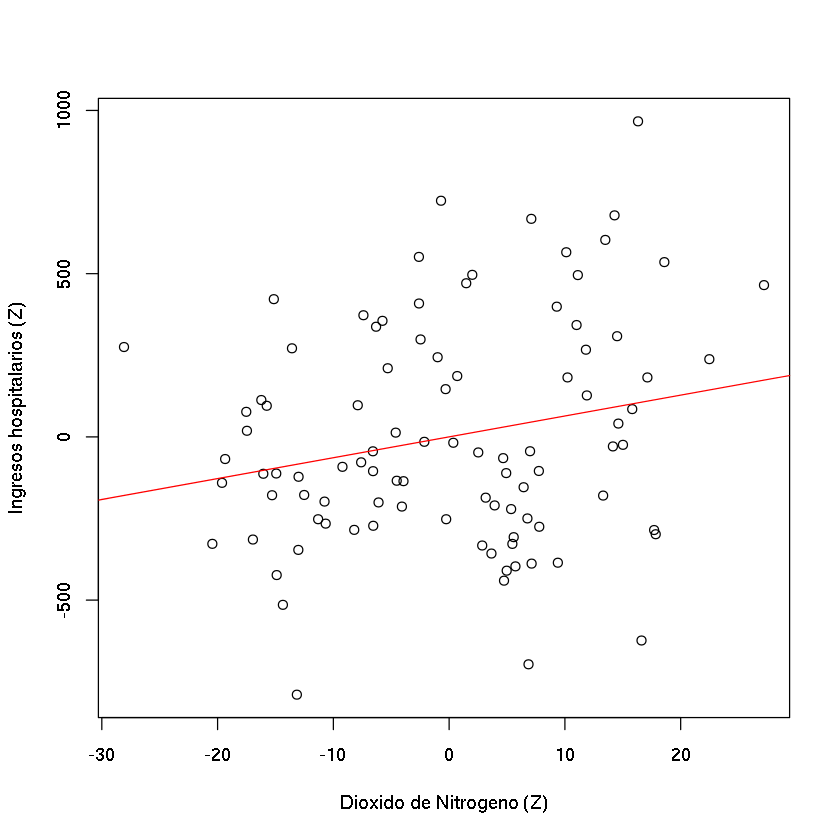

In [35]:
plot(NOM, enfM, xlab="Dioxido de Nitrogeno (Z)", ylab="Ingresos hospitalarios (Z)")
lin <- lm(enfM~NOM)
abline(lin$coefficients[1], lin$coefficients[2], col="red")

In [37]:
cor.test(NOM, enfM)


	Pearson's product-moment correlation

data:  NOM and enfM
t = 2.176, df = 94, p-value = 0.03206
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01935372 0.40183363
sample estimates:
    cor 
0.21899 


In [39]:
cor.test(NOM[1:(length(NOM)-1)], NOM[2:length(NOM)])


	Pearson's product-moment correlation

data:  NO[1:(length(NO) - 1)] and NOM[2:length(NO)]
t = 5.3821, df = 93, p-value = 5.486e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3169240 0.6272714
sample estimates:
      cor 
0.4873388 


In [40]:
cor.test(enfM[1:(length(enfM)-1)], enfM[2:length(enfM)])


	Pearson's product-moment correlation

data:  enfM[1:(length(enfM) - 1)] and enfM[2:length(enfM)]
t = 4.4605, df = 93, p-value = 2.286e-05
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2384306 0.5728739
sample estimates:
      cor 
0.4198005 


In [43]:
NOnext <-NOM[2:length(NOM)]
NOpre <- NOM[1:(length(NOM)-1)]
enfnext <-enfM[2:length(NOM)]
enfpre <- enfM[1:(length(NOM)-1)]

lin <- lm(enfnext ~NOnext+enfpre)
summary(lin)


Call:
lm(formula = enfnext ~ NOnext + enfpre)

Residuals:
    Min      1Q  Median      3Q     Max 
-684.23 -199.22   19.36  197.70  766.46 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.37439   31.36450   0.171   0.8643    
NOnext       5.44390    2.71061   2.008   0.0475 *  
enfpre       0.39714    0.09269   4.284  4.5e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 305.7 on 92 degrees of freedom
Multiple R-squared:  0.2108,	Adjusted R-squared:  0.1937 
F-statistic: 12.29 on 2 and 92 DF,  p-value: 1.861e-05


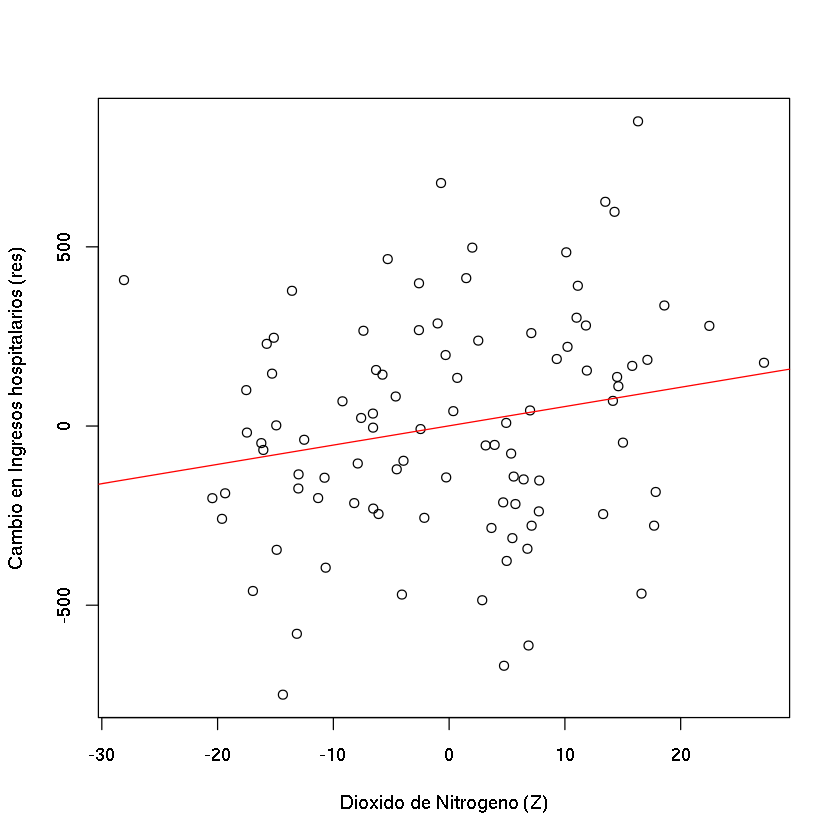

In [54]:
lin0 <- lm(enfnext ~ enfpre)
cenf <- lin0$residuals
plot(NOnext, cenf, xlab="Dioxido de Nitrogeno (Z)", ylab="Cambio en Ingresos hospitalarios (res)")
lin2 <- lm(cenf~NOnext)
abline(lin2$coefficients[1], lin2$coefficients[2], col="red")

In [55]:
cor.test(cenf,NOnext)


	Pearson's product-moment correlation

data:  cenf and NOnext
t = 2.0065, df = 93, p-value = 0.04771
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.002249831 0.389262537
sample estimates:
      cor 
0.2037005 


In [47]:
cor.test(lin$residuals[1:(length(lin$residuals)-1)], lin$residuals[2:length(lin$residuals)])


	Pearson's product-moment correlation

data:  lin$residuals[1:(length(lin$residuals) - 1)] and lin$residuals[2:length(lin$residuals)]
t = -0.23642, df = 92, p-value = 0.8136
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2261289  0.1788691
sample estimates:
       cor 
-0.0246409 


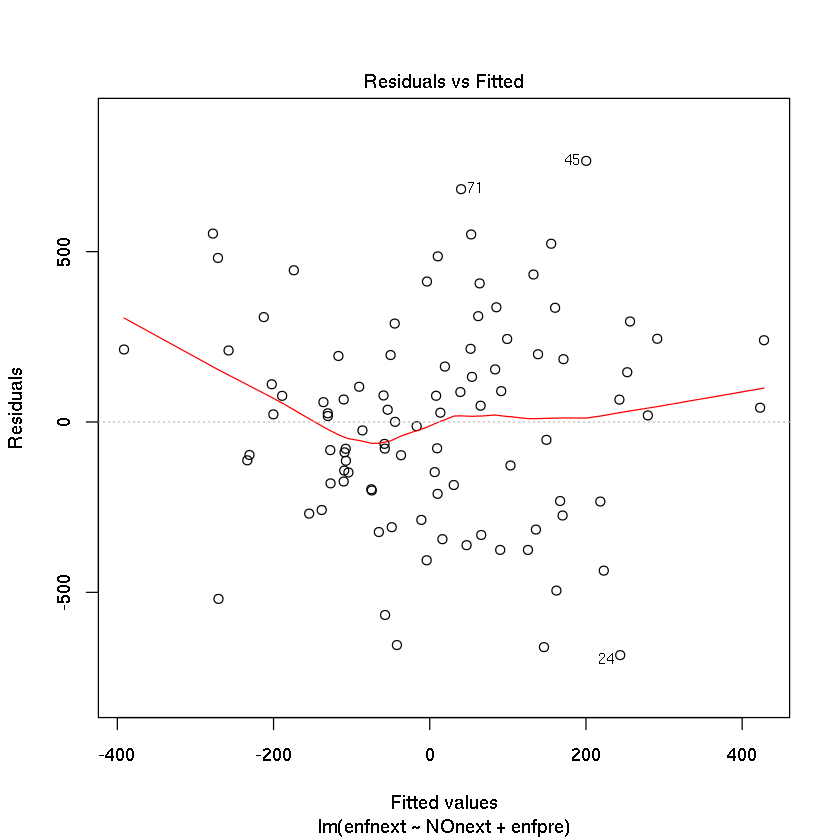

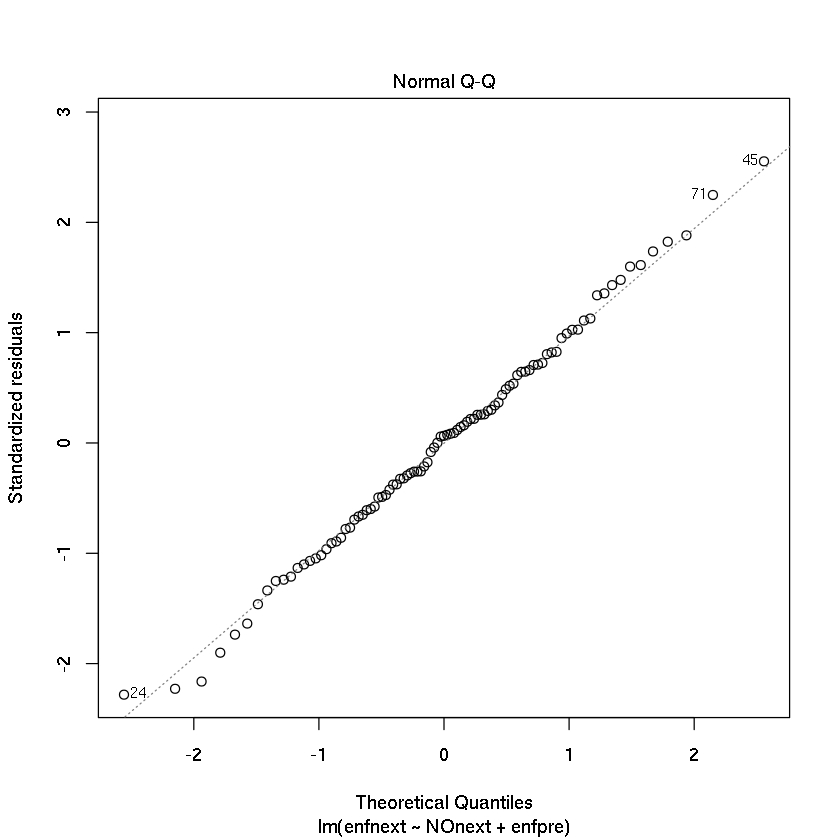

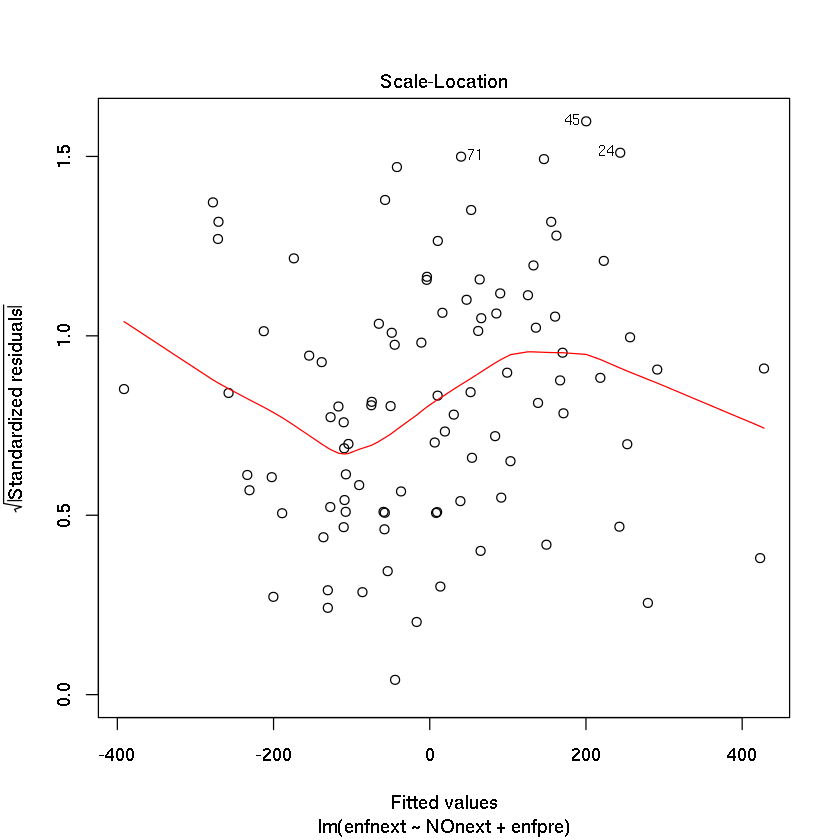

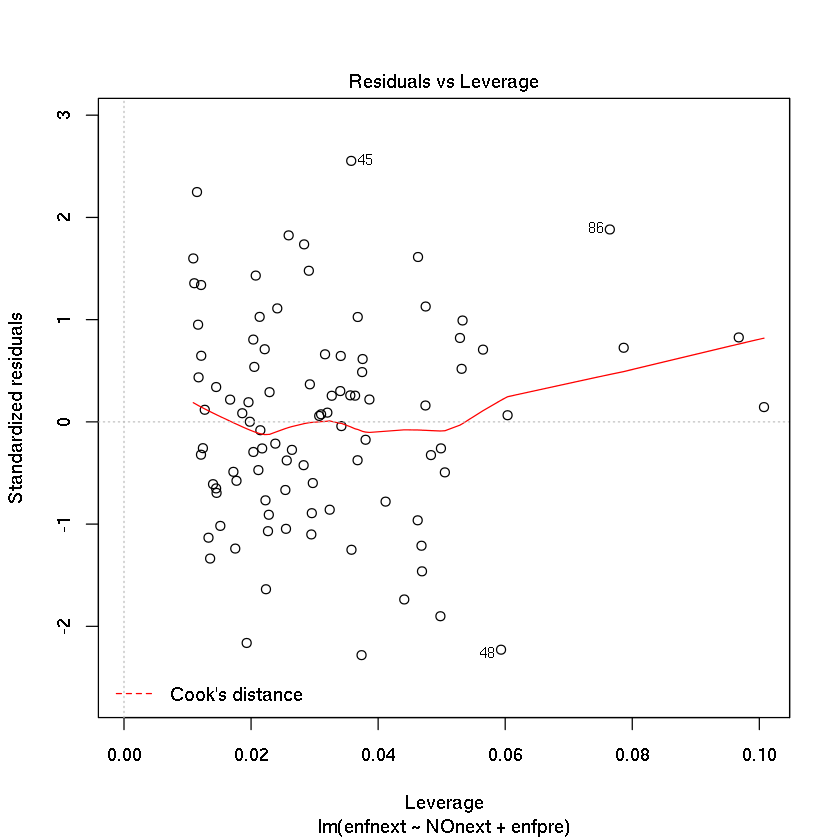

In [48]:
plot(lin)